**Assignment 1  : Algerian_forest_fires**

Name : Ajay Kumar

Student ID  : C0942384

Importing All the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# load the dataset and handle potential exceptions
try:
                                                                           # Load the Algerian forest fires dataset into a pandas DataFrame
   df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

                                                                            # Handle where the file is not found in the specified directory
except FileNotFoundError:
    print("The file could not be located.")
    exit()

In [3]:
df.info()     # getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


No Null Values

In [5]:
# Checking shape and duplicate data in dataset
print(f"Initial shape: {df.shape}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Initial shape: (243, 15)
Duplicate rows: 0


No Duplicate Values

In [6]:
# summary
df.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [7]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [8]:
# dropping some columns for EDA
dfc = df.drop(columns=['day','month','year'],axis=1)

In [9]:
#  Assigining the values of 0 or 1 to the classes coulmn 

dfc['Classes'] = np.where(dfc['Classes'].str.contains('not fire'),0 ,1 )

In [10]:
dfc['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
dfc.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


<Axes: >

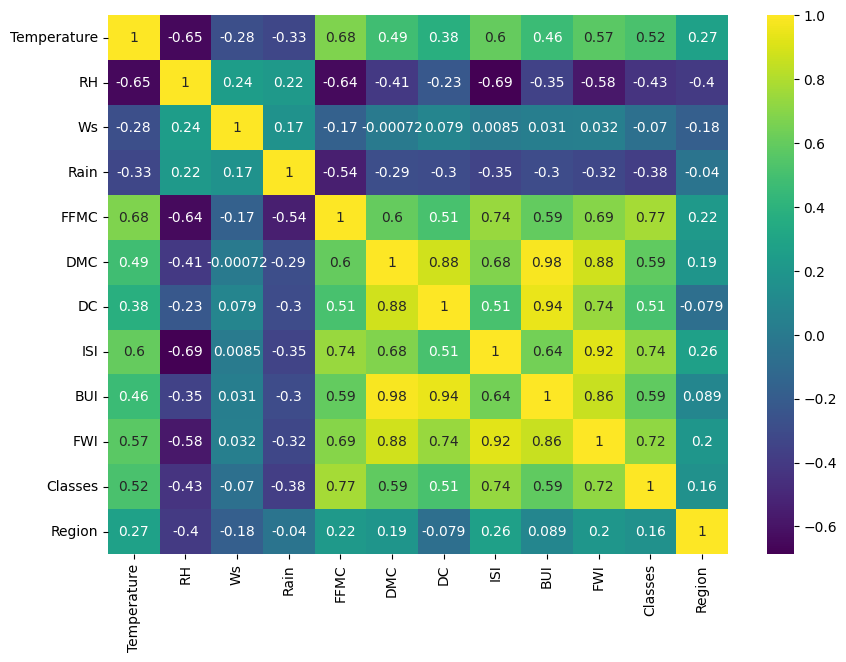

In [12]:
# Creating Heat Map to understand corelation among features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(dfc.corr(),annot=True, cmap ='viridis')


- **Temperature**: Higher temperatures are clearly linked to an increased risk of fires, since heat can help fires start and spread more easily.

- **BUI**: highly correalted with FWI: BUI built up index is a measure of the amount of combustible materials in a given area. Higher BUI values indicate high spread of fires. This is because the more combustible materials there are, the easier it is for fires to happen.

- **DMC (Duff Moisture Code) & DC (Drought Code)**: These two indicators are strongly connected to the Fire Weather Index (FWI). When they are high, it means the weather has been dry for a while, which increases the chances and intensity of wildfires.


- **Relative Humidity (RH)**: There is  negative correlation between RH and fire risk. i.e. when the air is more humid, it usually helps reduce the risk of fires.


Text(0.5, 1.0, 'Classes')

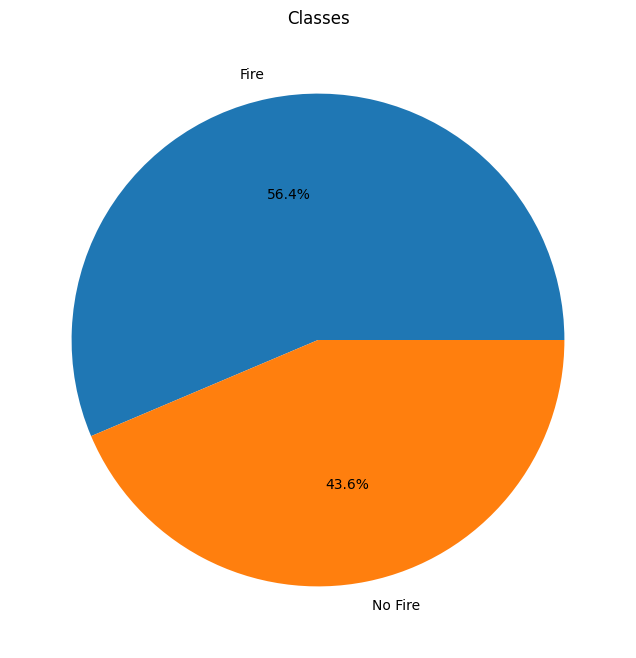

In [13]:
# plot pie charts 
class_lables = ["Fire","No Fire"]
plt.figure(figsize=(8,8))
percentage = dfc['Classes'].value_counts(normalize=True)*100
plt.pie(percentage,labels=class_lables,autopct='%1.1f%%')
plt.title("Classes")

Distribution of classes in dataset: 43.6% No fire and 56.4% Fire


In [14]:
# create input and target variables
X = dfc.drop('FWI', axis= 1) # Input Features
y = dfc['FWI'] # Target Variable


In [15]:
#Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=41)

 training data 80% and testing data 20 % With Random State of 41

In [17]:
#checking shape
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [18]:
# Training  all models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet()
}

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"\n{name} Evaluation:")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)



Linear Regression Evaluation:
MAE  : 0.5083
MSE  : 0.7221
RMSE : 0.8498
R²   : 0.9748

Ridge Evaluation:
MAE  : 0.5130
MSE  : 0.7089
RMSE : 0.8419
R²   : 0.9752

Lasso Evaluation:
MAE  : 0.9102
MSE  : 1.1489
RMSE : 1.0719
R²   : 0.9599

Elastic Net Evaluation:
MAE  : 1.3281
MSE  : 2.4488
RMSE : 1.5649
R²   : 0.9145


- **Ridge Regression** gives the best R² score (0.9752). It is clearly the most balanced and best-performing model.
- **Linear Regression** is close to Ridge Regression, but its R² score is slightly lower (0.9748).
- *Lasso and Elastic Net perform significantly worse.
- **Elastic Net** has the highest error rates, i.e., it is not suitable for this dataset.


In [19]:
# Hyperparameter Tuning with Cross-Validation
# Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Lasso
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

# Elastic Net
elastic_params = {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8]}
elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5, scoring='r2')
elastic_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8]},
             scoring='r2')

In [20]:
# Evaluate tuned models
evaluate_model("Tuned Ridge", ridge_cv.best_estimator_, X_test, y_test)
evaluate_model("Tuned Lasso", lasso_cv.best_estimator_, X_test, y_test)
evaluate_model("Tuned Elastic Net", elastic_cv.best_estimator_, X_test, y_test)

# Print best parameters
print("\nBest Hyperparameters:")
print("Ridge:", ridge_cv.best_params_)
print("Lasso:", lasso_cv.best_params_)
print("Elastic Net:", elastic_cv.best_params_)



Tuned Ridge Evaluation:
MAE  : 0.5130
MSE  : 0.7089
RMSE : 0.8419
R²   : 0.9752

Tuned Lasso Evaluation:
MAE  : 0.4899
MSE  : 0.6833
RMSE : 0.8266
R²   : 0.9761

Tuned Elastic Net Evaluation:
MAE  : 0.5046
MSE  : 0.6939
RMSE : 0.8330
R²   : 0.9758

Best Hyperparameters:
Ridge: {'alpha': 1}
Lasso: {'alpha': 0.01}
Elastic Net: {'alpha': 0.01, 'l1_ratio': 0.5}


- **Tuned Lasso Regression** is now the best model. It has:
  - The lowest MAE, MSE, and RMSE
  - The highest R² score (0.9761)
- **Tuned Elastic Net** also got much better and is now almost same as Lasso.
- **Tuned Ridge Regression** stayed the same, showing that using alpha = 1 was already a good choice for this dataset.

therefore
- **Tuned Lasso Regression** is the best model.


In [21]:
import pickle
# Saving the tuned Lasso model
with open('best_model_lasso.pkl', 'wb') as file:
    pickle.dump(lasso_cv.best_estimator_, file)

print("model saved successfully as 'best_model_lasso.pkl'")



model saved successfully as 'best_model_lasso.pkl'


In [22]:
# Load the saved model
with open('best_model_lasso.pkl', 'rb') as file:
    best_model = pickle.load(file)

print("Model loaded successfully.")


Model loaded successfully.


In [23]:
# creating Unseen data with the average values of each column
unseen_data = pd.DataFrame({
    'Temperature': [25.2, 27.0, 32.3, 31.8, 24.5],       
    'RH': [62, 50, 63, 51, 64],                         
    'Ws': [15.5, 15.0, 16.0, 14.5, 15.8],               
    'Rain': [5.7, 2.6, 0.8, 0.5, 1.9],                  
    'FFMC': [77.8, 68.0, 87.5, 84.9, 78.1],             
    'DMC': [3.7, 14.2, 5.0, 13.8, 4.9],              
    'DC': [7.4, 28.0, 40.0, 27.5, 8.2],               
    'ISI': [1.7, 2.5, 4.8, 4.6, 3.0],                  
    'BUI': [4.7, 11.0, 16.5, 16.8, 5.2],              
    'Classes': [0,0,1,1,0],               
    'Region': [0, 1, 0, 0, 1]                           
})

In [24]:
unseen_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,25.2,62,15.5,5.7,77.8,3.7,7.4,1.7,4.7,0,0
1,27.0,50,15.0,2.6,68.0,14.2,28.0,2.5,11.0,0,1
2,32.3,63,16.0,0.8,87.5,5.0,40.0,4.8,16.5,1,0
3,31.8,51,14.5,0.5,84.9,13.8,27.5,4.6,16.8,1,0
4,24.5,64,15.8,1.9,78.1,4.9,8.2,3.0,5.2,0,1


In [25]:
# Predicting with the best model
unseen_scaled = scaler.transform(unseen_data)

# Predict using the loaded model
unseen_predictions = best_model.predict(unseen_scaled)

# Print predictions
print("Predictions on unseen data:\n", unseen_predictions)


Predictions on unseen data:
 [0.32460596 3.42996502 6.45956687 7.07007774 1.64979334]


Predicted data was within Range.Model was able to predict Target Variable.  
FWI of 6.45 and 7.07 means high chance of fire which is true as their class is 1 i.e. fire

In [26]:
# We can also Generate predictions on the unseen test data
unseen_pred = best_model.predict(X_test)
# Print the predictions
#Calculate evaluation metrics on unseen test data
mae = mean_absolute_error(y_test, unseen_pred)
mse = mean_squared_error(y_test, unseen_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, unseen_pred)

#Display the model performance metrics
print("\nModel Evaluation on Unseen Test Data:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R² Score : {r2:.4f}")


Model Evaluation on Unseen Test Data:
MAE  : 0.4899
MSE  : 0.6833
RMSE : 0.8266
R² Score : 0.9761


In [ ]:
 # Github
  # https://github.com/akajay07/Neural-Networks-and-Deep-Learning/tree/dev